In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In this dataset, the focus of interest is in the conversion rate of visitors to a site that have been pseudo-randomly assigned to one of two groups. Thus the primary interest of this notebook is to assess the difference in conversion rate between users assigned to the new vs. old page layouts.

The first step in this process is to ensure that the information is consistent. For this we will ensure the timestamp column is one of datetime objects, and the landing_page column is more clearly labeled with a simple binary indicator. The next step is then to look for missing and duplicate information; if there is, then what to do with it.

In [3]:
df.landing_page = np.where(df.landing_page == 'old_page', 'A','B')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,A,0
1,804228,2017-01-12 08:01:45.159739,control,A,0
2,661590,2017-01-11 16:55:06.154213,treatment,B,0
3,853541,2017-01-08 18:28:03.143765,treatment,B,0
4,864975,2017-01-21 01:52:26.210827,control,A,1


In [5]:
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S.%f')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   converted     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


In [6]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [7]:
def label_fig(ax, spacing=5):
    for rect in ax.patches:
        y_val = rect.get_height()
        x_val = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_val < 0:
            space *= -1
            va = 'top'
        label = '{:.2f}'.format(y_val)
        ax.annotate(
            label,
            (x_val,y_val),
            xytext=(0, space),
            textcoords = 'offset points',
            ha='center',
            va=va
        )

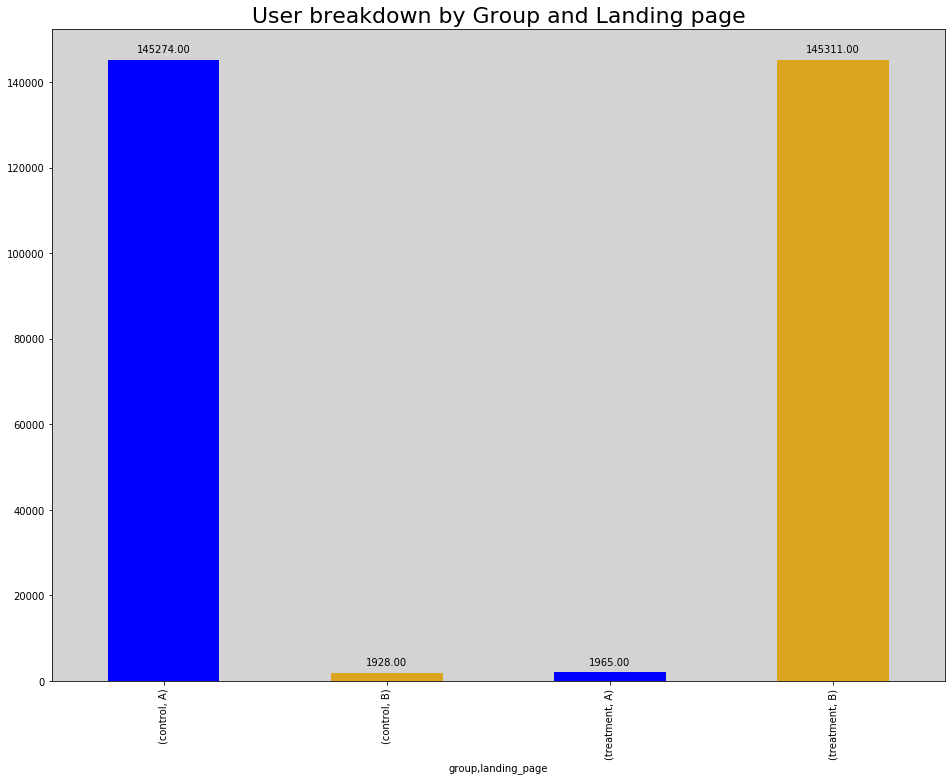

In [8]:
_, ax = plt.subplots(1,1,figsize=(16,12))
df.groupby(['group','landing_page'])['user_id'].count().plot(
    kind='bar',
    color=['blue','goldenrod']
)
label_fig(ax)
ax.set_facecolor('lightgray')
plt.title('User breakdown by Group and Landing page', fontsize='22')
plt.show()

There are no missing values in any of the categories. Due to the nature of the data one can assume that the control group is intended to be assigned to page 'A' while the treatment group is assigned to page 'B', thus allowing for the comparison in conversion rate due to the features of both pages.

Here it is shown that there are some erroneously assigned users in the control and treatment group that have been given the wrong assigned page. 

In [9]:
temp = df[df.user_id.duplicated() == True]
temp

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,A,0
2893,773192,2017-01-14 02:55:59.590927,treatment,B,0
7500,899953,2017-01-07 03:06:54.068237,control,B,0
8036,790934,2017-01-19 08:32:20.329057,treatment,B,0
10218,633793,2017-01-17 00:16:00.746561,treatment,A,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,B,0
294309,787083,2017-01-17 00:15:20.950723,control,A,0
294328,641570,2017-01-09 21:59:27.695711,control,A,0
294331,689637,2017-01-13 11:34:28.339532,control,B,0


In [10]:
df[df.user_id.isin(temp.user_id.tolist())].sort_values(by=['user_id','timestamp'],ascending=True).head(40)

,user_id,timestamp,group,landing_page,converted
213114,630052,2017-01-07 12:25:54.089486,treatment,A,1
230259,630052,2017-01-17 01:16:05.208766,treatment,B,0
22513,630126,2017-01-14 13:35:54.778695,treatment,A,0
251762,630126,2017-01-19 17:16:00.280440,treatment,B,0
183371,630137,2017-01-20 02:08:49.893878,control,A,0
11792,630137,2017-01-22 14:59:22.051308,control,B,0
207211,630320,2017-01-07 18:02:43.626318,control,A,0
255753,630320,2017-01-12 05:27:37.181803,treatment,A,0
96929,630471,2017-01-07 02:14:17.405726,control,B,0
110634,630471,2017-01-23 01:42:51.501851,control,A,0


There are very clearly a number of individuals that have visited the same page multiple times and have either been assigned to different groups and gotten the same page, or been given different pages while remaining in the same group with different conversion rates for each instance. Therefore it makes sense to remove the data on these users from the dataset entirely.

In [11]:
df = df[~df.user_id.isin(temp.user_id.tolist())]


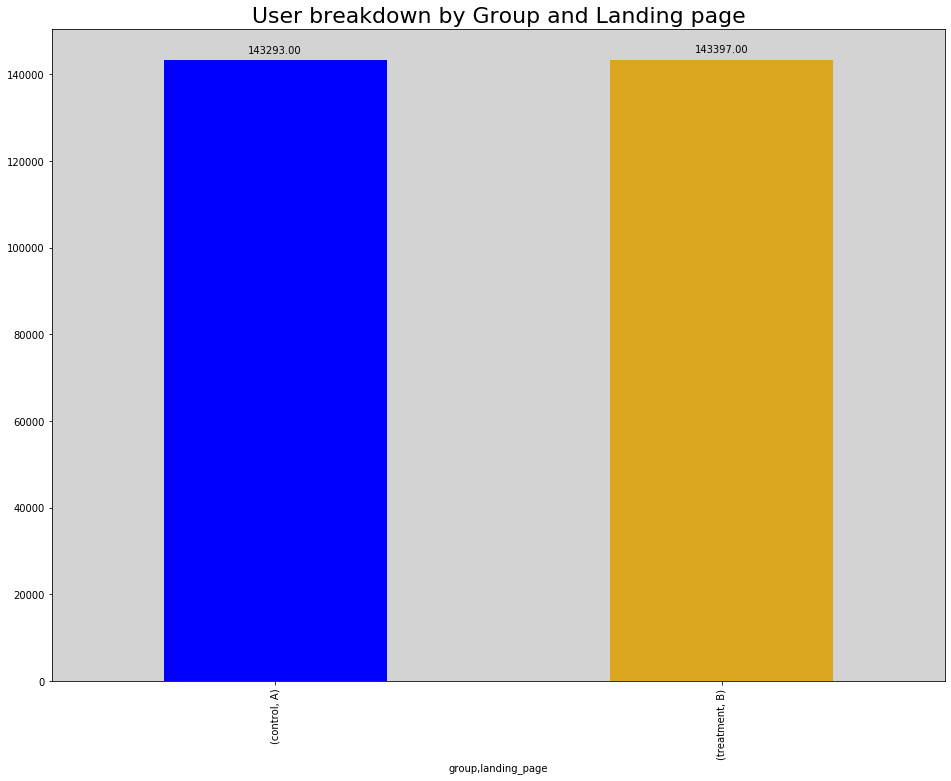

In [12]:
_, ax = plt.subplots(1,1,figsize=(16,12))
df.groupby(['group','landing_page'])['user_id'].count().plot(
    kind='bar',
    color=['blue','goldenrod']
)
label_fig(ax)
ax.set_facecolor('lightgray')
plt.title('User breakdown by Group and Landing page', fontsize='22')
plt.show()

Removing the the users with duplicate entries entirely from the dataset results in a roughly equal distribution with there being < 1% difference in population sizes.

In [13]:
from scipy.stats import chi2_contingency

In [14]:
cross_res = pd.crosstab([df.landing_page],df.converted, margins=False)
cross_res

converted,0,1
landing_page,,
A,126073,17220
B,126372,17025


In [15]:
chi2_contingency(cross_res)

(1.4130704135085597,
 0.2345473551640334,
 1,
 array([[126176.71137814,  17116.28862186],
        [126268.28862186,  17128.71137814]]))

Performing a Chi^2 contigency test on the number of conversions for each page, the resulting test statistic and p-value suggest that there is no significant improvement on the user conversion between layouts. Thus the hypothesis: The new page will result in a higher conversion rate, is rejected.